In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
dfg = pd.read_csv('wat-out-good-time_router.csv')
dfm = pd.read_csv('wat-out-mal-time_router.csv')

In [4]:
dfg

,time,router,target
0,7,0,1
1,11,1,1
2,15,2,1
3,19,3,1
4,23,7,1
...,...,...,...
245671,3152973,0,1
245672,3152974,0,1
245673,3152975,0,1
245674,3152975,4,1


In [5]:
dfm

,time,router,target
0,7,0,0
1,7,1,0
2,11,5,0
3,11,1,0
4,15,2,0
...,...,...,...
258120,3150824,5,0
258121,3150825,13,0
258122,3150827,1,0
258123,3150828,9,0


In [6]:
df = dfg.append(dfm, ignore_index=True)
df = df.sort_values('time')

In [7]:
df.to_csv('wat-time-router.csv',index=False)


In [8]:
df = pd.read_csv("wat-time-router.csv")
df

,time,router,target
0,7,0,1
1,7,1,0
2,7,0,0
3,11,5,0
4,11,1,0
...,...,...,...
503796,3152973,0,1
503797,3152974,0,1
503798,3152975,0,1
503799,3152975,4,1


In [9]:
df.corr()

,time,router,target
time,1.000000,0.025150,0.048453
router,0.025150,1.000000,0.002486
target,0.048453,0.002486,1.000000


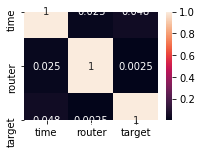

In [10]:
plt.figure(figsize=(3,2))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [11]:
train_X = df.drop(columns=['target'])

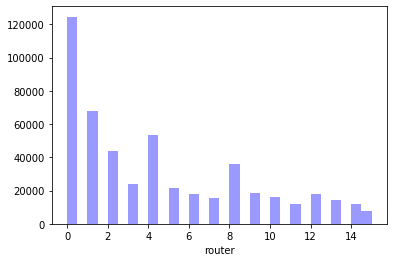

In [12]:
sns.distplot(df['router'], kde = False, bins=30, color='blue')

Text(0, 0.5, 'time')

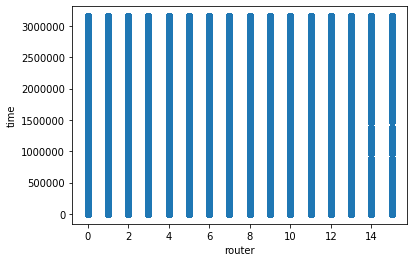

In [13]:
# scatter plot
fig, ax = plt.subplots()

ax.scatter(df['router'], df['time'])
# set a title and labels
ax.set_xlabel('router')
ax.set_ylabel('time')

In [14]:
df_500 = pd.read_csv('wat-time-router.csv',nrows=500)

Text(0, 0.5, 'time')

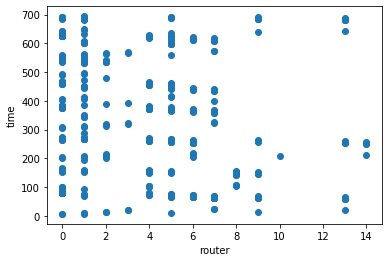

In [15]:
# scatter plot 100

fig, ax = plt.subplots()

ax.scatter(df_500['router'], df_500['time'])

# set a title and labels
ax.set_xlabel('router')
ax.set_ylabel('time')

Text(0, 0.5, 'Frequency')

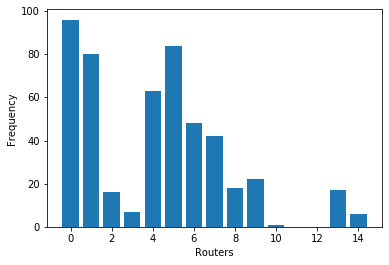

In [16]:
# bar chart by router

fig, ax = plt.subplots() 

# count the occurrence of each class 
data = df_500['router'].value_counts()

# get x and y data 
points = data.index 
frequency = data.values

# create bar chart 
ax.bar(points, frequency)

# set title and labels 
ax.set_xlabel('Routers') 
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

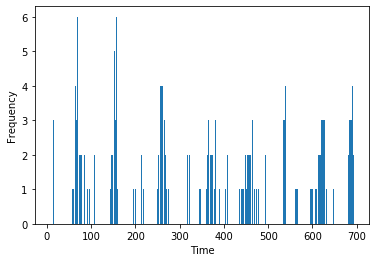

In [17]:
# bar chart by time

fig, ax = plt.subplots() 

# count the occurrence of each class 
data = df_500['time'].value_counts()

# get x and y data 
points = data.index 
frequency = data.values

# create bar chart 
ax.bar(points, frequency)

# set title and labels 
ax.set_xlabel('Time') 
ax.set_ylabel('Frequency')

In [18]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1
0,0.000000,0.000000
1,0.000000,0.066667
2,0.000000,0.000000
3,0.000001,0.333333
4,0.000001,0.066667
...,...,...
503796,0.999998,0.000000
503797,0.999998,0.000000
503798,0.999999,0.000000
503799,0.999999,0.266667


In [19]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,target
0,1.000000,0.025150,0.048453
1,0.025150,1.000000,0.002486
target,0.048453,0.002486,1.000000


In [20]:
train_Y = corr_df['target']

In [21]:
train_Y.value_counts()

0    258125
1    245676
Name: target, dtype: int64

#### machine learning models

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.3, random_state=0)

In [23]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [24]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.692847
         Iterations 3
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.000     
Dependent Variable: target           AIC:              698118.0609
Date:               2020-05-02 08:45 BIC:              698140.3208
No. Observations:   503801           Log-Likelihood:   -3.4906e+05
Df Model:           1                LL-Null:          -3.4905e+05
Df Residuals:       503799           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     3.0000                                        
---------------------------------------------------------------------
       Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
---------------------------------------------------------------------
0      0.0744      0.0056     13.3462    0.0000     0.0635     0.0853
1     -0.1456      0.0086    -16.9349    

In [25]:
logreg = LogisticRegression(C=1,penalty='l2',random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred = logreg.predict(X_test)
print('Accuracy {:.2f}'.format(accuracy_score(y_test,y_pred)))
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Accuracy 0.52
Train Prediction Score 51.37185958146657
Test Prediction  51.512164138122685


In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[47954 29618]
 [43667 29902]]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.62      0.57     77572
           1       0.50      0.41      0.45     73569

    accuracy                           0.52    151141
   macro avg       0.51      0.51      0.51    151141
weighted avg       0.51      0.52      0.51    151141



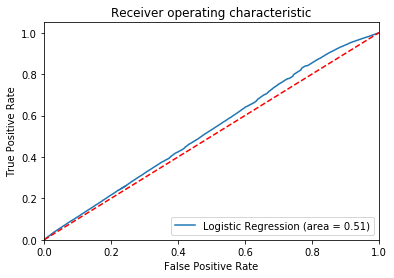

In [30]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [31]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
y_pred_knn= logreg.predict(X_test)

In [33]:
knn_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 51.37185958146657
Test Prediction  51.512164138122685


In [34]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[47954 29618]
 [43667 29902]]


In [35]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.52      0.62      0.57     77572
           1       0.50      0.41      0.45     73569

    accuracy                           0.52    151141
   macro avg       0.51      0.51      0.51    151141
weighted avg       0.51      0.52      0.51    151141



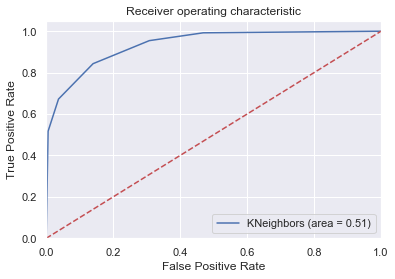

In [119]:
logit_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [37]:
#supportvectormachines
from sklearn.svm import SVC

In [ ]:
ksvc = SVC(kernel = 'rbf',random_state = 42,probability=True)
ksvc.fit(X_train,y_train)

In [ ]:
y_pred_ksvc= ksvc.predict(X_test)

In [ ]:
ksvc_score_train = ksvc.score(X_train,y_train)
print("Train Prediction Score",ksvc_score_train*100)
ksvc_score_test = accuracy_score(y_test,y_pred_ksvc)
print("Test Prediction Score",ksvc_score_test*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred_ksvc)
print(cm)

In [ ]:
print(classification_report(y_test,y_pred_ksvc))

In [13]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [14]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
y_pred_nb= nb.predict(X_test)

In [16]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 51.549651222140305
Test Prediction Score 51.49562329215765


In [17]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[39035 38537]
 [34773 38796]]


In [18]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.53      0.50      0.52     77572
           1       0.50      0.53      0.51     73569

    accuracy                           0.51    151141
   macro avg       0.52      0.52      0.51    151141
weighted avg       0.52      0.51      0.51    151141



In [19]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [27]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.4 )

Train on 211596 samples, validate on 141064 samples
Epoch 1/10
211596/211596 [==============================] - 25s 118us/step - loss: 0.6928 - accuracy: 0.5120 - val_loss: 0.6927 - val_accuracy: 0.5125
Epoch 2/10
211596/211596 [==============================] - 21s 98us/step - loss: 0.6925 - accuracy: 0.5125 - val_loss: 0.6920 - val_accuracy: 0.5165
Epoch 3/10
211596/211596 [==============================] - 27265s 129ms/step - loss: 0.6919 - accuracy: 0.5134 - val_loss: 0.6916 - val_accuracy: 0.5153
Epoch 4/10
211596/211596 [==============================] - 11s 54us/step - loss: 0.6919 - accuracy: 0.5128 - val_loss: 0.6916 - val_accuracy: 0.5152
Epoch 5/10
211596/211596 [==============================] - 11s 52us/step - loss: 0.6919 - accuracy: 0.5135 - val_loss: 0.6916 - val_accuracy: 0.5140
Epoch 6/10
211596/211596 [==============================] - 10s 47us/step - loss: 0.6919 - accuracy: 0.5136 - val_loss: 0.6917 - val_accuracy: 0.5146
Epoch 7/10
211596/211596 [=================

In [28]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(4, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.4 )

Train on 211596 samples, validate on 141064 samples
Epoch 1/10
211596/211596 [==============================] - 23s 107us/step - loss: 0.6933 - accuracy: 0.5139 - val_loss: 0.6922 - val_accuracy: 0.5171
Epoch 2/10
211596/211596 [==============================] - 25s 120us/step - loss: 0.6920 - accuracy: 0.5131 - val_loss: 0.6916 - val_accuracy: 0.5144
Epoch 3/10
211596/211596 [==============================] - 25s 119us/step - loss: 0.6919 - accuracy: 0.5130 - val_loss: 0.6916 - val_accuracy: 0.5159
Epoch 4/10
211596/211596 [==============================] - 25s 118us/step - loss: 0.6919 - accuracy: 0.5141 - val_loss: 0.6916 - val_accuracy: 0.5161
Epoch 5/10
211596/211596 [==============================] - 25s 116us/step - loss: 0.6919 - accuracy: 0.5134 - val_loss: 0.6917 - val_accuracy: 0.5146
Epoch 6/10
211596/211596 [==============================] - 23s 107us/step - loss: 0.6919 - accuracy: 0.5127 - val_loss: 0.6916 - val_accuracy: 0.5140
Epoch 7/10
211596/211596 [================

In [29]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.4 )

Train on 211596 samples, validate on 141064 samples
Epoch 1/10
211596/211596 [==============================] - 32s 149us/step - loss: 0.6923 - accuracy: 0.5128 - val_loss: 0.6916 - val_accuracy: 0.5145
Epoch 2/10
211596/211596 [==============================] - 29s 138us/step - loss: 0.6919 - accuracy: 0.5129 - val_loss: 0.6918 - val_accuracy: 0.5182
Epoch 3/10
211596/211596 [==============================] - 30s 140us/step - loss: 0.6919 - accuracy: 0.5129 - val_loss: 0.6915 - val_accuracy: 0.5152
Epoch 4/10
211596/211596 [==============================] - 31s 146us/step - loss: 0.6919 - accuracy: 0.5138 - val_loss: 0.6917 - val_accuracy: 0.5145
Epoch 5/10
211596/211596 [==============================] - 30s 141us/step - loss: 0.6919 - accuracy: 0.5129 - val_loss: 0.6916 - val_accuracy: 0.5147
Epoch 6/10
211596/211596 [==============================] - 30s 141us/step - loss: 0.6919 - accuracy: 0.5130 - val_loss: 0.6915 - val_accuracy: 0.5160
Epoch 7/10
211596/211596 [================